<center> <h1> Classification  using : -</h1></center>
 

 <ul>
  <li> SVM</li>
        <li> Decision Tree</li>
        <li>Random Forest</li>
    </ul>

<h2> Important Library, which is used</h2>

<h5> 
  numerical library  
 </h5>


In [75]:

import numpy as np 
import pandas as pd 

<h5> 
  visualization library 
 </h5>
 

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

<h5> sklearn for preprocessing and model</h5>

In [77]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsTransformer


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, classification_report

In [78]:

from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Bidirectional, GRU, Dense,Dropout
from keras.models import Model, load_model, Sequential

## data analysis 

In [79]:
df=pd.read_csv("../dataset/card_transdata.csv")

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [81]:
df=df.sample(200000)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
522858,0.955692,0.180873,0.581674,0.0,1.0,0.0,0.0,0.0
817960,8.438437,49.415130,1.361130,1.0,0.0,0.0,0.0,0.0
446044,22.552782,26.372759,0.372814,1.0,1.0,0.0,1.0,0.0
121082,0.896029,1.399311,0.234472,0.0,1.0,0.0,1.0,0.0
296790,18.759009,0.537172,0.964541,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
616571,39.945052,0.157582,1.777416,1.0,0.0,0.0,0.0,0.0
780409,17.215193,0.826043,0.341964,1.0,0.0,0.0,1.0,0.0
942620,67.528821,6.253039,1.422071,1.0,0.0,0.0,1.0,0.0
719002,2.042163,3.883496,1.385744,1.0,0.0,0.0,0.0,0.0


In [82]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,26.722230,4.924735,1.834339,0.882215,0.350735,0.101305,0.649925,0.087850
std,66.797881,19.646211,2.922097,0.322354,0.477201,0.301733,0.476994,0.283077
min,0.022599,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.906597,0.297108,0.476130,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.970536,0.994023,0.997169,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.739023,3.352791,2.098256,1.000000,1.000000,0.000000,1.000000,0.000000
max,8777.136420,1481.926029,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
df.isnull().sum() # there is no null value 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [84]:
def print_unique_column(dfColumn):
    for column in dfColumn:
        print(f'{column} : {df[column].unique()}')
print_unique_column(df)

distance_from_home : [ 0.95569237  8.43843714 22.55278175 ... 67.52882145  2.04216337
  4.4051742 ]
distance_from_last_transaction : [ 0.18087253 49.41512979 26.3727593  ...  6.25303921  3.88349614
  0.43733229]
ratio_to_median_purchase_price : [0.58167411 1.36112996 0.37281369 ... 1.42207142 1.385744   0.75578967]
repeat_retailer : [0. 1.]
used_chip : [1. 0.]
used_pin_number : [0. 1.]
online_order : [0. 1.]
fraud : [0. 1.]


## Removing  outlier 

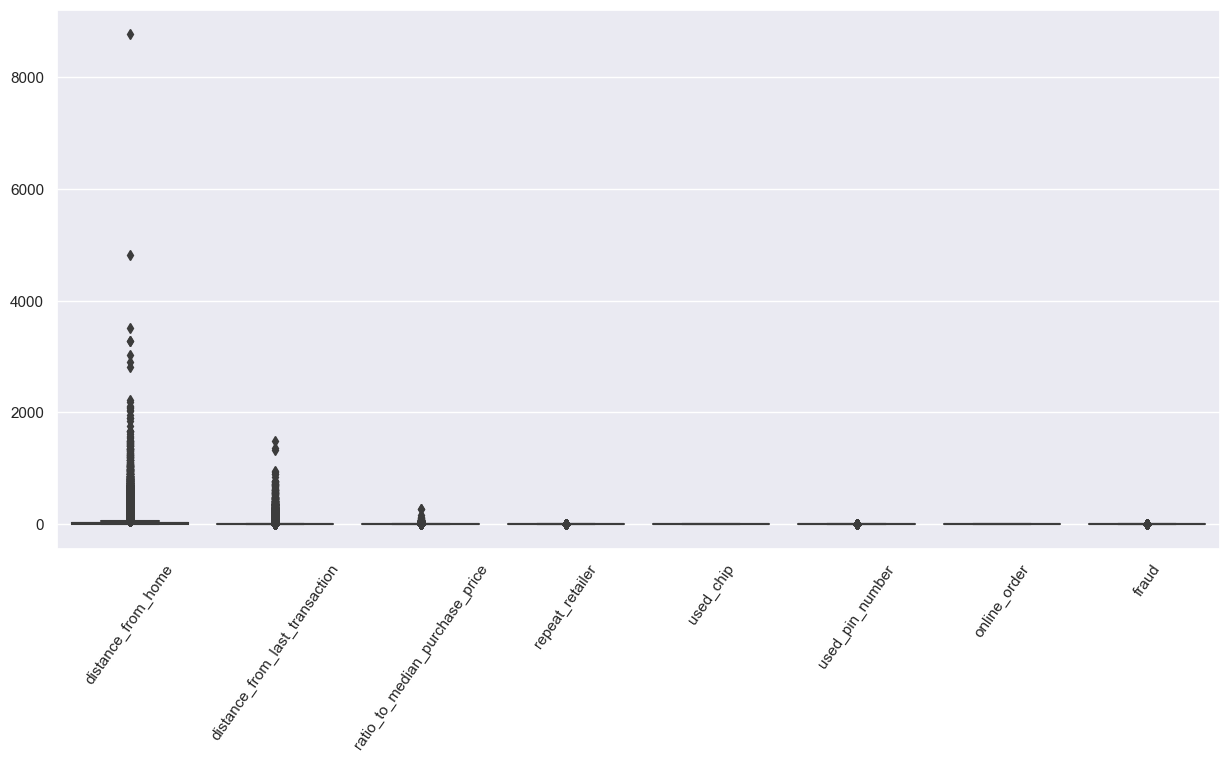

In [85]:
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data=df)
plt.xticks(rotation=55)
plt.show()

<h2> Using  Quartile</h2>

In [86]:
col='distance_from_home'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f'min :{lower_limit} max: {upper_limit} for {col}' )

print(f'number of row remover in outlier {len(df[(df[col]<lower_limit)|(df[col]>upper_limit)])}')

df=df[(df[col]>lower_limit)&(df[col]<upper_limit)]
df.shape
      

min :-28.84204079304321 max: 58.487661103215714 for distance_from_home
number of row remover in outlier 20793


(179207, 8)

In [87]:
col='distance_from_last_transaction'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f'min :{lower_limit} max: {upper_limit} for {col}' )

print(f'number of row remover in outlier {len(df[(df[col]<lower_limit)|(df[col]>upper_limit)])}')

df=df[(df[col]>lower_limit)&(df[col]<upper_limit)]
df.shape

min :-4.279987237196438 max: 7.923873544291822 for distance_from_last_transaction
number of row remover in outlier 22259


(156948, 8)

In [88]:
 
col='ratio_to_median_purchase_price'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f'min :{lower_limit} max: {upper_limit} for {col}' )

print(f'number of row remove in outlier: {len(df[(df[col]<lower_limit)|(df[col]>upper_limit)])}')

df=df[(df[col]>lower_limit)&(df[col]<upper_limit)]
df.shape

min :-1.9557488974764943 max: 4.534803108553935 for ratio_to_median_purchase_price
number of row remove in outlier: 13386


(143562, 8)

## After removing outlier 

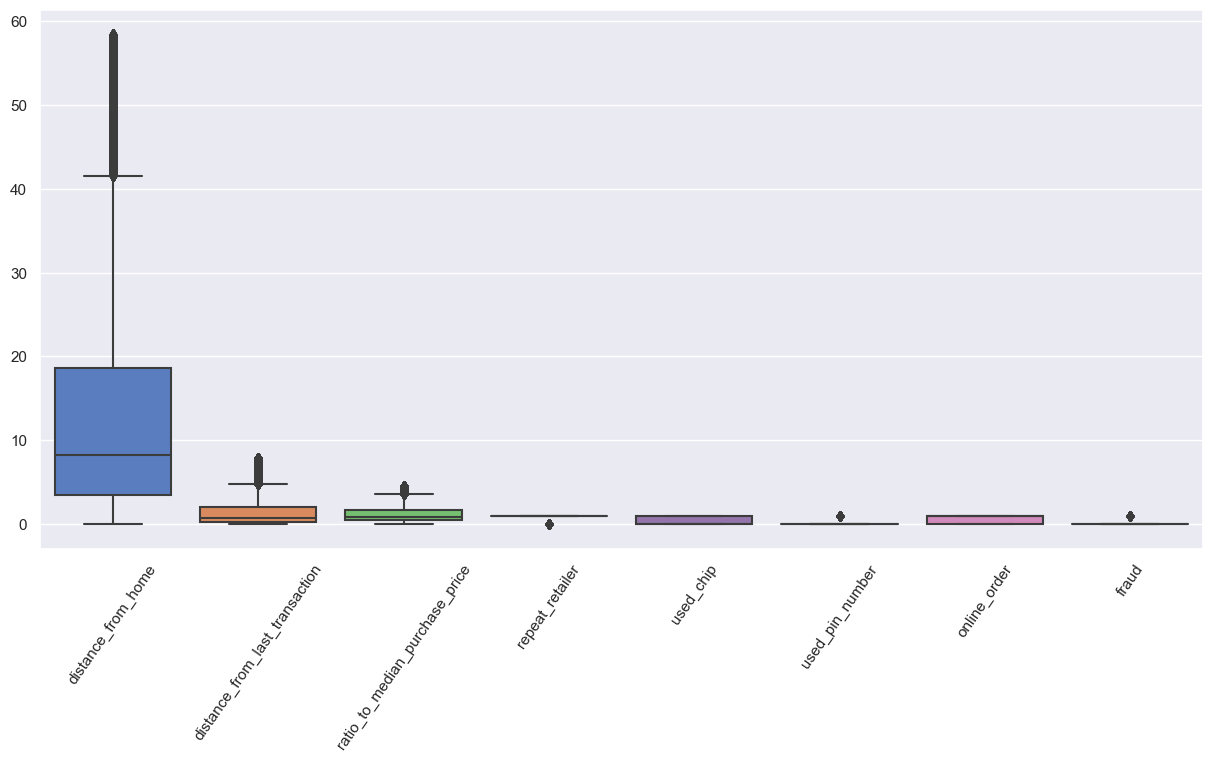

In [89]:
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(data=df)
plt.xticks(rotation=55)
plt.show()

## <h2>  Data Transformations</h2>

In [90]:
print_unique_column(df)

distance_from_home : [ 0.95569237  0.89602895 18.75900918 ... 17.21519296  2.04216337
  4.4051742 ]
distance_from_last_transaction : [0.18087253 1.39931087 0.53717215 ... 0.82604339 3.88349614 0.43733229]
ratio_to_median_purchase_price : [0.58167411 0.23447243 0.96454127 ... 0.34196386 1.385744   0.75578967]
repeat_retailer : [0. 1.]
used_chip : [1. 0.]
used_pin_number : [0. 1.]
online_order : [0. 1.]
fraud : [0. 1.]


<ul>
<li> 1 distance_from_home  scalling in  0 to 1 </li>
<li> convert float into int </li>
</ul>

In [91]:
scaler=MinMaxScaler()
col_to_scale=['distance_from_home','ratio_to_median_purchase_price','distance_from_last_transaction']
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])


In [92]:
print_unique_column(df)
df.sample(5)

distance_from_home : [0.01595993 0.01493943 0.32047359 ... 0.29406766 0.03454328 0.07496098]
distance_from_last_transaction : [0.0228134  0.17659525 0.06778278 ... 0.10424187 0.49012987 0.05518177]
ratio_to_median_purchase_price : [0.1274289  0.05078685 0.21194382 ... 0.07451474 0.30492102 0.16586355]
repeat_retailer : [0. 1.]
used_chip : [1. 0.]
used_pin_number : [0. 1.]
online_order : [0. 1.]
fraud : [0. 1.]


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
493546,0.062070,0.749549,0.114922,1.0,1.0,0.0,0.0,0.0
535909,0.669598,0.006968,0.254921,1.0,0.0,0.0,1.0,0.0
561461,0.173727,0.015377,0.034678,1.0,0.0,0.0,1.0,0.0
847048,0.337292,0.331326,0.071997,1.0,0.0,0.0,1.0,0.0
749054,0.665329,0.230638,0.095991,1.0,0.0,0.0,1.0,0.0


<h2>  Data visualization </h2>

# count Plot

In [93]:
fraud_data = df[df['fraud'] == 1]
cols=df.columns[3:7]
cols

Index(['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'], dtype='object')

In [94]:
fraud_data_one = df[df['fraud'] == 1]

def count_plot_One(cols):
    for col in cols: 
        sns.countplot(data=fraud_data_one, x=col)
        plt.xticks(rotation=45)
        plt.show()
        
fraud_data_zero = df[df['fraud'] == 0]
def count_plot_zero(cols):
    for col in cols: 
        sns.countplot(data=fraud_data_zero, x=col)
        plt.xticks(rotation=45)
        plt.show()

In [95]:
print_unique_column(df)

distance_from_home : [0.01595993 0.01493943 0.32047359 ... 0.29406766 0.03454328 0.07496098]
distance_from_last_transaction : [0.0228134  0.17659525 0.06778278 ... 0.10424187 0.49012987 0.05518177]
ratio_to_median_purchase_price : [0.1274289  0.05078685 0.21194382 ... 0.07451474 0.30492102 0.16586355]
repeat_retailer : [0. 1.]
used_chip : [1. 0.]
used_pin_number : [0. 1.]
online_order : [0. 1.]
fraud : [0. 1.]


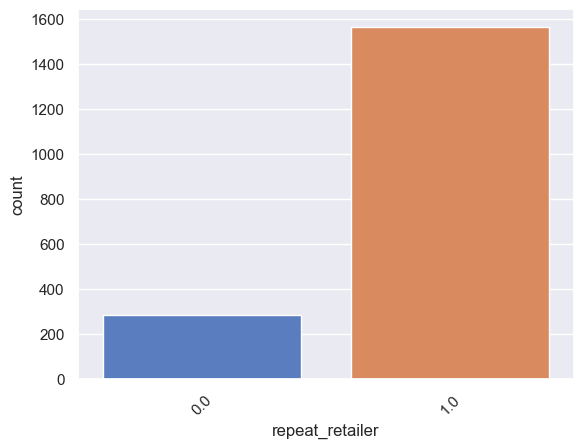

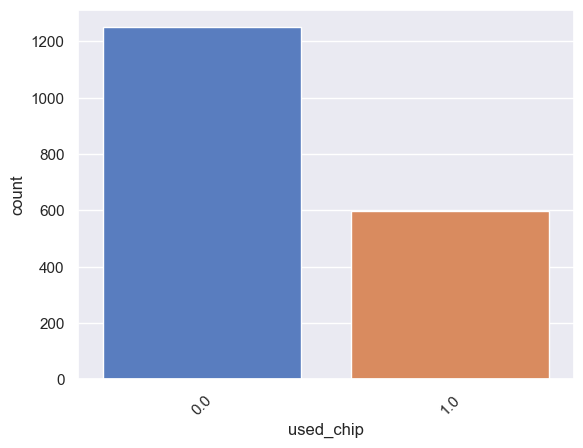

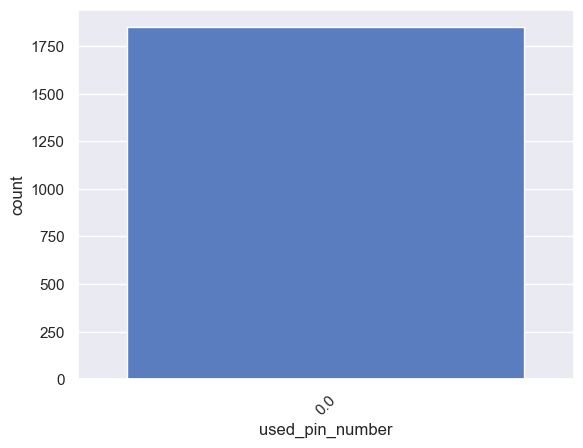

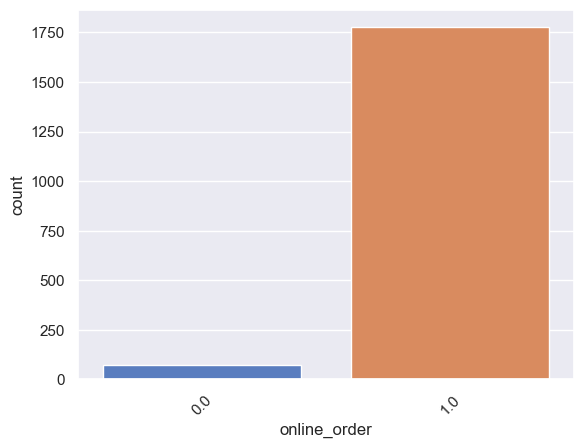

In [96]:
count_plot_One(cols)



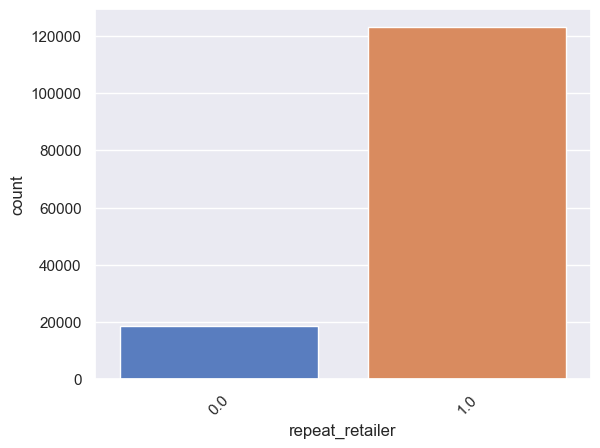

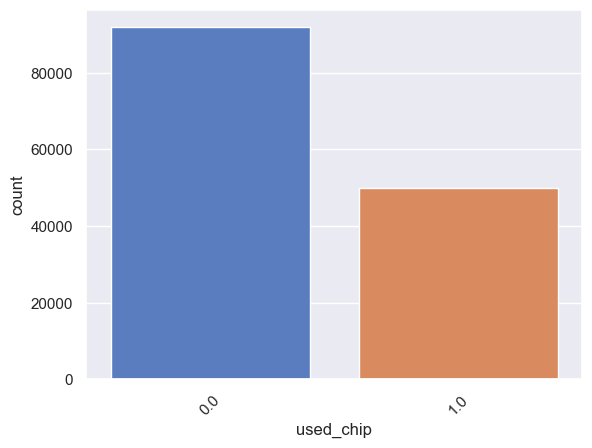

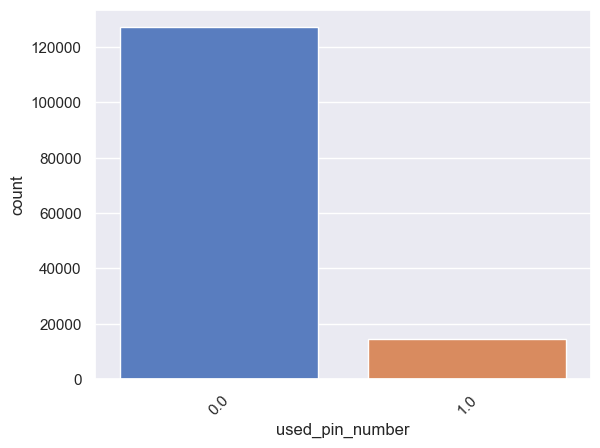

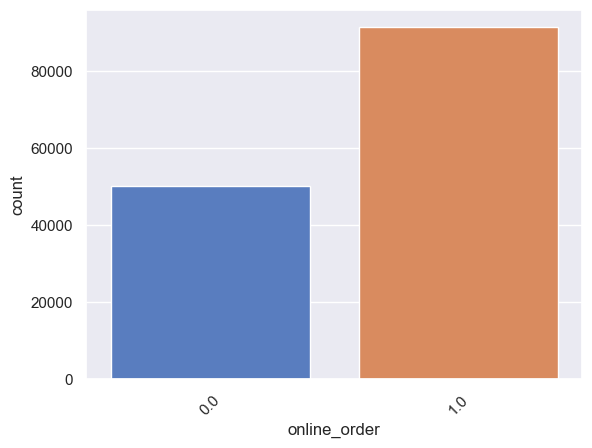

In [97]:
count_plot_zero(cols)

<AxesSubplot: >

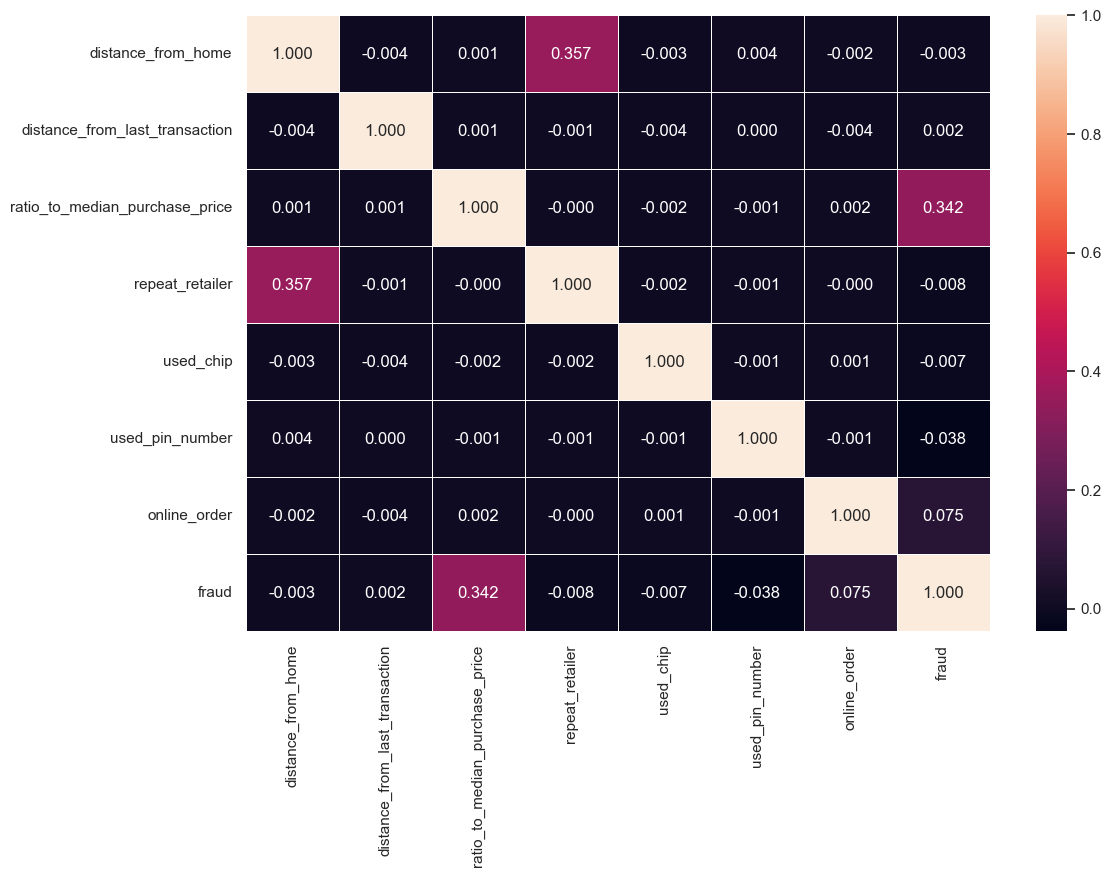

In [98]:
 
#correlation map
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)
 

## Feature selection 

In [99]:
x=df.drop('fraud',axis=1)
y=df["fraud"]


In [100]:
x.sample(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
697646,0.304418,0.047899,0.070923,1.0,0.0,1.0,1.0
672451,0.439204,0.885962,0.291709,1.0,0.0,0.0,1.0
125760,0.011650,0.097423,0.212836,0.0,1.0,0.0,0.0


<h3> spliting data set in  traning and test data </h3>

In [101]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=.2,random_state=3,stratify=y)

<h2>  Applying Model </h2>

In [102]:
def model_Fun_All(models,X_train, y_train, X_test, y_test):
    for mdl in models :
        model = mdl()
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        print("\n\n\n\n")
        print("...............",model,".........................\n")
        print("Accuracy", acc, "\n")

        y_pred = model.predict(X_test)
        # print("preds", y_pred[:5], "\n")

        print( classification_report(y_test,y_pred))
        cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

        plt.title(model)
        
        sns.heatmap(cm, annot=True, fmt='d')
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.show()
    return 0

## models

In [104]:

models=[SVC,DecisionTreeClassifier,RandomForestClassifier]
model_Fun_All(models,X_train, y_train, X_test, y_test)






............... SVC() .........................

Accuracy 0.9996865531292446 



# under sampling 


In [ ]:
# Class count
count_class_0, count_class_1 = df.fraud.value_counts()

# Divide by class
df_class_0 = df[df['fraud'] == 0]
df_class_1 = df[df['fraud'] == 1]
count_class_0, count_class_1


(71059, 845)

In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.fraud.value_counts())

Random under-sampling:
0.0    845
1.0    845
Name: fraud, dtype: int64


In [ ]:
# df_test_under

In [ ]:
x_under=df_test_under.drop('fraud',axis='columns')
y_under=df_test_under['fraud']
y_under.value_counts(),df_test_under.shape

(0.0    845
 1.0    845
 Name: fraud, dtype: int64,
 (1690, 8))

<h4> Apply model</h4> 

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x_under, y_under, test_size=0.25, random_state=1,stratify=y_under)
y_train.value_counts(),y_test.value_counts()


(0.0    634
 1.0    633
 Name: fraud, dtype: int64,
 1.0    212
 0.0    211
 Name: fraud, dtype: int64)






............... SVC() .........................

Accuracy 0.9952718676122931 

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       211
         1.0       0.99      1.00      1.00       212

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



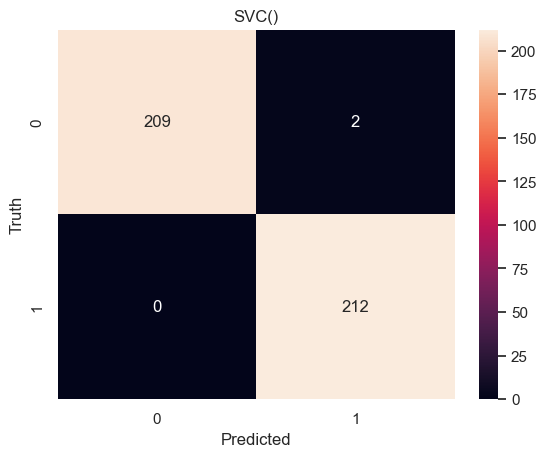






............... DecisionTreeClassifier() .........................

Accuracy 1.0 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       211
         1.0       1.00      1.00      1.00       212

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



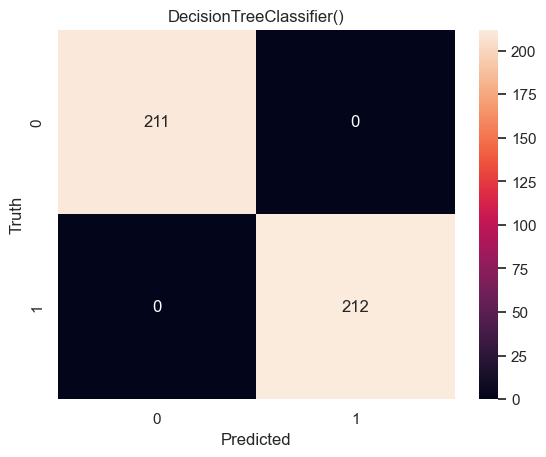






............... RandomForestClassifier() .........................

Accuracy 1.0 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       211
         1.0       1.00      1.00      1.00       212

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



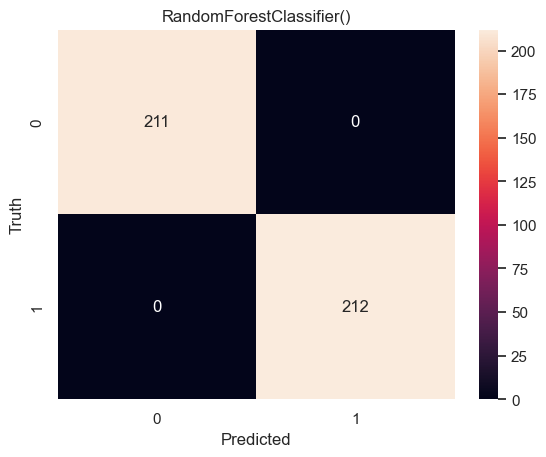

0

In [ ]:
model_Fun_All(models,X_train, y_train, X_test, y_test)

## over fiting 

In [ ]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.fraud.value_counts())

Random over-sampling:
0.0    71059
1.0    71059
Name: fraud, dtype: int64


In [ ]:
df_test_over.sample(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
576005,0.140493,0.032706,0.228883,1.0,1.0,0.0,0.0,0.0
895226,0.203416,0.013180,0.399898,1.0,0.0,0.0,0.0,0.0
466868,0.158330,0.344107,0.081742,1.0,0.0,0.0,0.0,0.0


In [ ]:
x_over = df_test_over.drop('fraud',axis='columns')
y_over = df_test_over['fraud']
 
 

In [ ]:
 
X_train, X_test, y_train, y_test = train_test_split(x_over,y_over, test_size=0.2, random_state=42,stratify=y_over)
y_train.value_counts(),y_test.value_counts()


(1.0    56847
 0.0    56847
 Name: fraud, dtype: int64,
 1.0    14212
 0.0    14212
 Name: fraud, dtype: int64)

In [ ]:
model_Fun_All(models,X_train, y_train, X_test, y_test)

## Encoder


In [ ]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
X=df.drop('fraud',axis=1)
y=df['fraud']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.15, shuffle=True)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (61118, 7)
x_test shape:  (10786, 7)
y_train shape:  (61118,)
y_test shape:  (10786,)


In [ ]:
#Standardize features 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#AUTOENCODER DENSE LAYERS
capa_entrada =  Input(shape=(x_train.shape[1],)) 
encoded_layer_1 = Dense(25, activation='relu',name='encoder_layer_1')(capa_entrada)
encoded_layer_2 = Dense(20, activation='relu',name='encoder_layer_2')(encoded_layer_1)
encoded_layer_3 = Dense(15, activation='relu',name='encoder_layer_3')(encoded_layer_2)

## latent view
latent_view   = Dense(10, activation='tanh',name='latent_layer')(encoded_layer_3)

#Decoded
decoded_layer_1 = Dense(15, activation='relu',name='decoder_layer_1')(latent_view)
decoded_layer_2 = Dense(20, activation='relu',name='decoder_layer_2')(decoded_layer_1)
decoded_layer_3 = Dense(25, activation='relu',name='decoder_layer_3')(decoded_layer_2)

##output layer
output_layer  = Dense(x_train.shape[1],name='output_layer')(decoded_layer_3)

autoencoder_Dense = Model(capa_entrada, output_layer)
encoder_Dense = Model(capa_entrada,latent_view)

In [ ]:
#Summary
autoencoder_Dense.summary()
encoder_Dense.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7)]               0         
                                                                 
 encoder_layer_1 (Dense)     (None, 25)                200       
                                                                 
 encoder_layer_2 (Dense)     (None, 20)                520       
                                                                 
 encoder_layer_3 (Dense)     (None, 15)                315       
                                                                 
 latent_layer (Dense)        (None, 10)                160       
                                                                 
 decoder_layer_1 (Dense)     (None, 15)                165       
                                                                 
 decoder_layer_2 (Dense)     (None, 20)                320 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=50)
autoencoder_Dense.compile(optimizer='adam', loss='mse',metrics=['mse','acc'])

In [ ]:
history = autoencoder_Dense.fit(x_train,x_train,
                          epochs=30,
                          batch_size=256,
                          validation_data=(x_test, x_test),
                          callbacks=[early_stop])

Epoch 1/30
239/239 [==============================] - 2s 3ms/step - loss: 0.5222 - mse: 0.5222 - acc: 0.5353 - val_loss: 0.1325 - val_mse: 0.1325 - val_acc: 0.8899
Epoch 2/30
239/239 [==============================] - 1s 2ms/step - loss: 0.0619 - mse: 0.0619 - acc: 0.9338 - val_loss: 0.0304 - val_mse: 0.0304 - val_acc: 0.9596
Epoch 3/30
239/239 [==============================] - 0s 2ms/step - loss: 0.0195 - mse: 0.0195 - acc: 0.9648 - val_loss: 0.0129 - val_mse: 0.0129 - val_acc: 0.9714
Epoch 4/30
239/239 [==============================] - 0s 2ms/step - loss: 0.0086 - mse: 0.0086 - acc: 0.9766 - val_loss: 0.0070 - val_mse: 0.0070 - val_acc: 0.9785
Epoch 5/30
239/239 [==============================] - 1s 2ms/step - loss: 0.0051 - mse: 0.0051 - acc: 0.9801 - val_loss: 0.0051 - val_mse: 0.0051 - val_acc: 0.9805
Epoch 6/30
239/239 [==============================] - 1s 2ms/step - loss: 0.0036 - mse: 0.0036 - acc: 0.9825 - val_loss: 0.0041 - val_mse: 0.0041 - val_acc: 0.9809
Epoch 7/30
239/2

In [ ]:
#random forest
X_train = encoder_Dense(x_train)
X_test = encoder_Dense(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def rf(X_train, y_train, n_estimators=300):
    clf = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
    clf.fit(X_train, y_train)
    return clf

random_forest_en = rf(X_train,y_train, n_estimators=300) 

In [ ]:
print('Train accuracy: ', random_forest_en.score(X_train, y_train))
print('Test accuracy: ', random_forest_en.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.9976821806044873


In [ ]:
import itertools
def plot_confusion_matrix(model, X, y, class_names, file_name,
                          normalize=False,
                          title='CONFUSION MATRIX',
                          cmap=plt.cm.Greys):
    y_pred = model.predict(X)
    # Compute confusion matrix
    cnf_matrix  = confusion_matrix(y, y_pred)
    np.set_printoptions(precision=1)
    plt.figure(figsize=(18, 16))

    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("CONFUSION MATRIX")
    else:
        print('CONFUSION MATRIX')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title('CONFUSION MATRIX')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.ylabel('CLASS')
    plt.xlabel('PREDICTED CLASS')
    plt.tight_layout()
    plt.savefig(file_name+'.png')
    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
LABELS = ['Normal_transaction', 'Fraud_transaction']

CONFUSION MATRIX


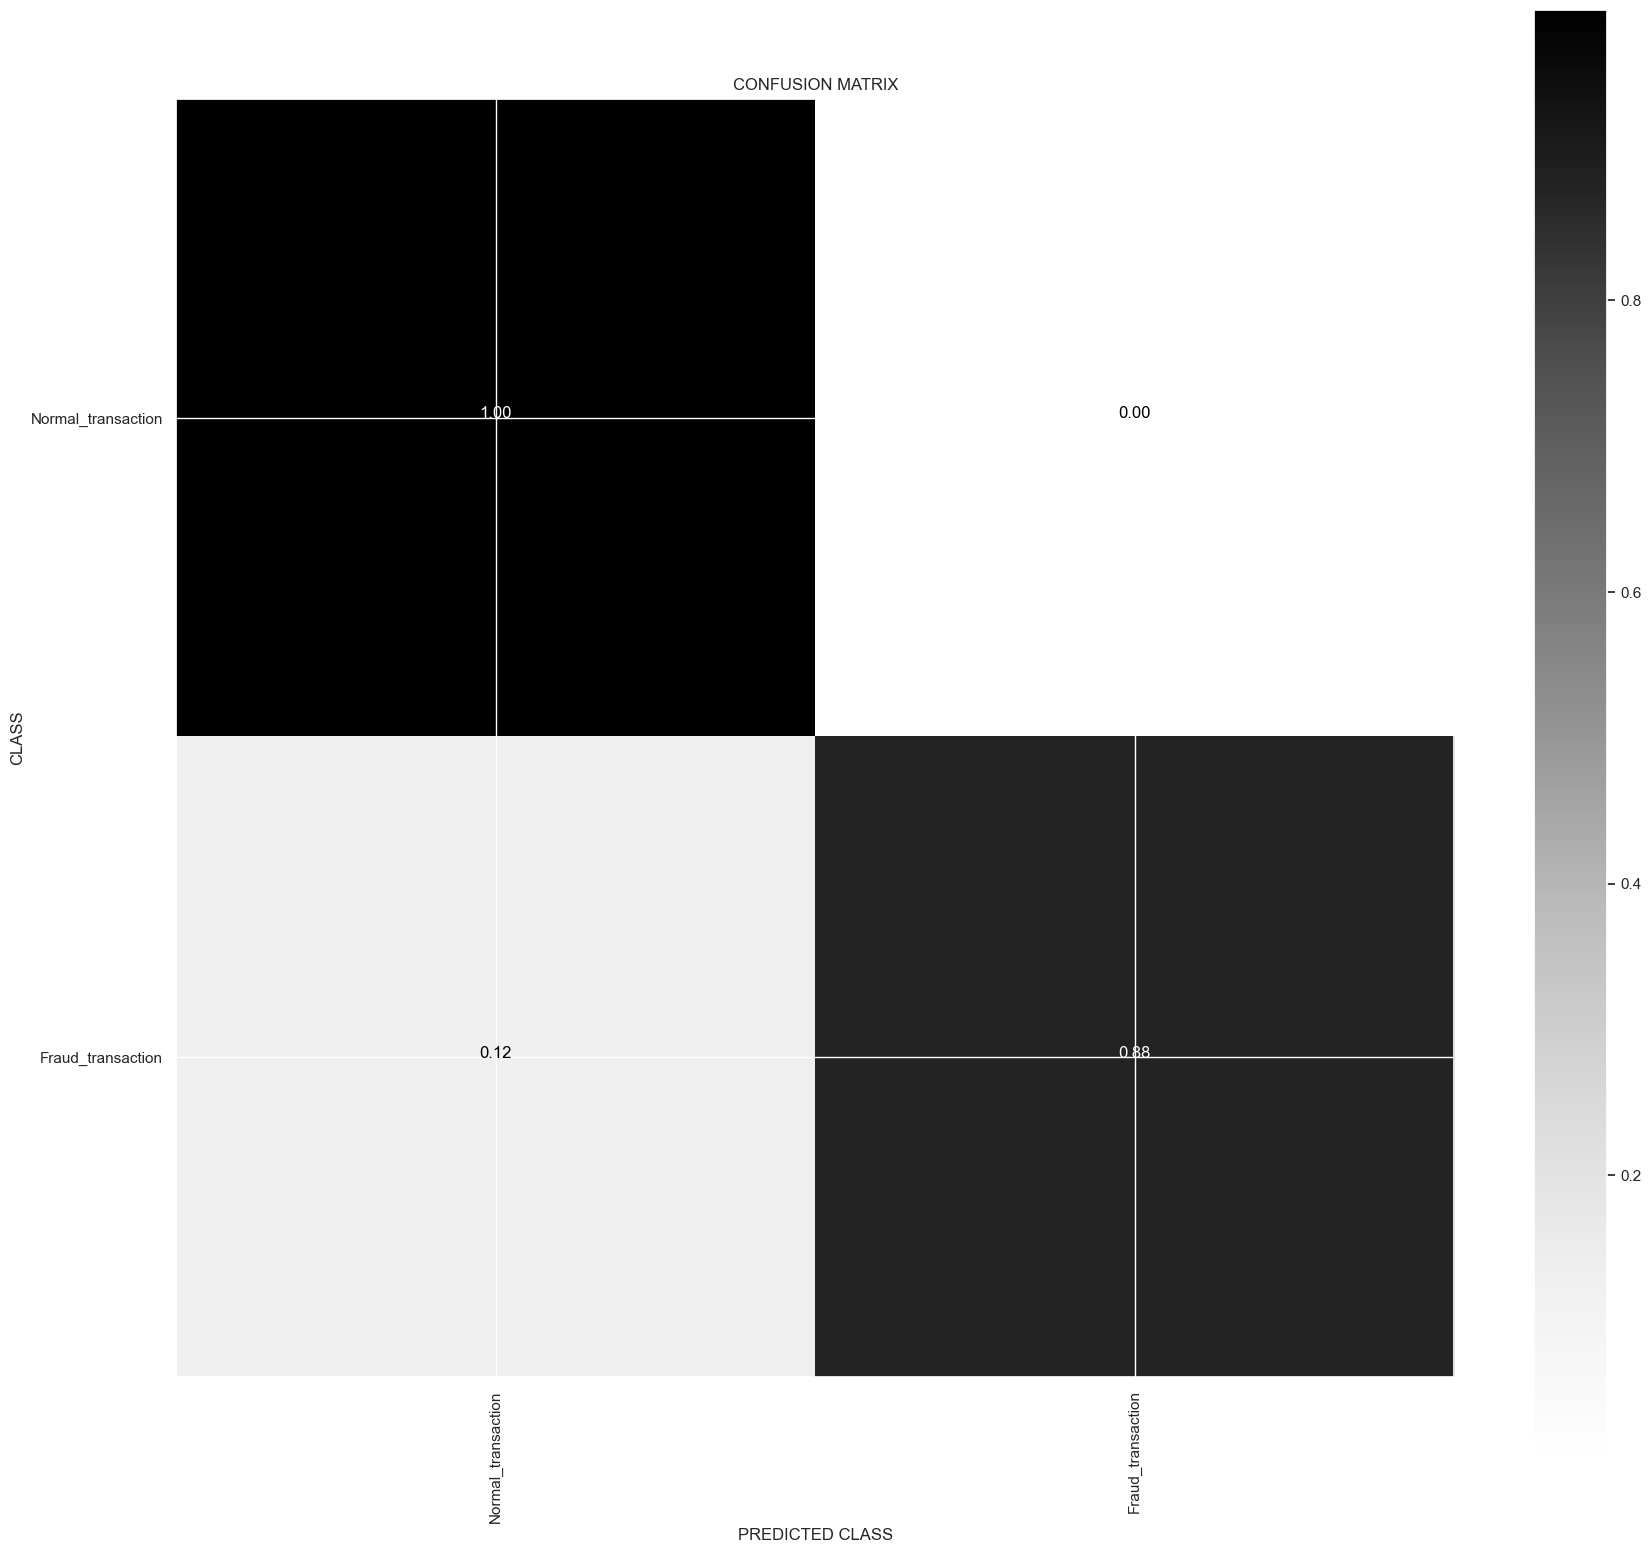

In [ ]:
plot_confusion_matrix(random_forest_en, X_test, y_test, class_names=LABELS, file_name='ConfussionMatri-RF', normalize=True)